# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
main_df = pd.read_csv("telecom_users.csv")
main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService       OnlineSecurity  \
0          Yes           Yes              No  No internet service   
1          Yes            No     Fiber optic                   No   
2          Yes           Yes     Fiber optic                   No   
3          Yes            No             DSL                   No   
4          Yes            No             DSL                  Yes   

          OnlineBackup     DeviceProtection          TechSupport  \
0  No internet service  No internet service  No internet service   
1                  Yes                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                   No   
4                   No                  Yes                   No   

           StreamingTV      StreamingMovies        Contract PaperlessBilling  \
0  No internet service  No internet service        Two year               No   
1                  Yes                   No  Month-to-month              Yes   
2                   No                   No  Month-to-month              Yes   
3                   No                  Yes  Month-to-month              Yes   
4                   No                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No

In [4]:
main_df.describe()

Unnamed: 0  SeniorCitizen       tenure  MonthlyCharges
count  5986.000000    5986.000000  5986.000000     5986.000000
mean   3533.561310       0.161377    32.468760       64.802213
std    2035.705666       0.367909    24.516391       30.114702
min       0.000000       0.000000     0.000000       18.250000
25%    1777.250000       0.000000     9.000000       35.650000
50%    3546.500000       0.000000    29.000000       70.400000
75%    5291.750000       0.000000    56.000000       89.900000
max    7042.000000       1.000000    72.000000      118.750000

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


<AxesSubplot:>

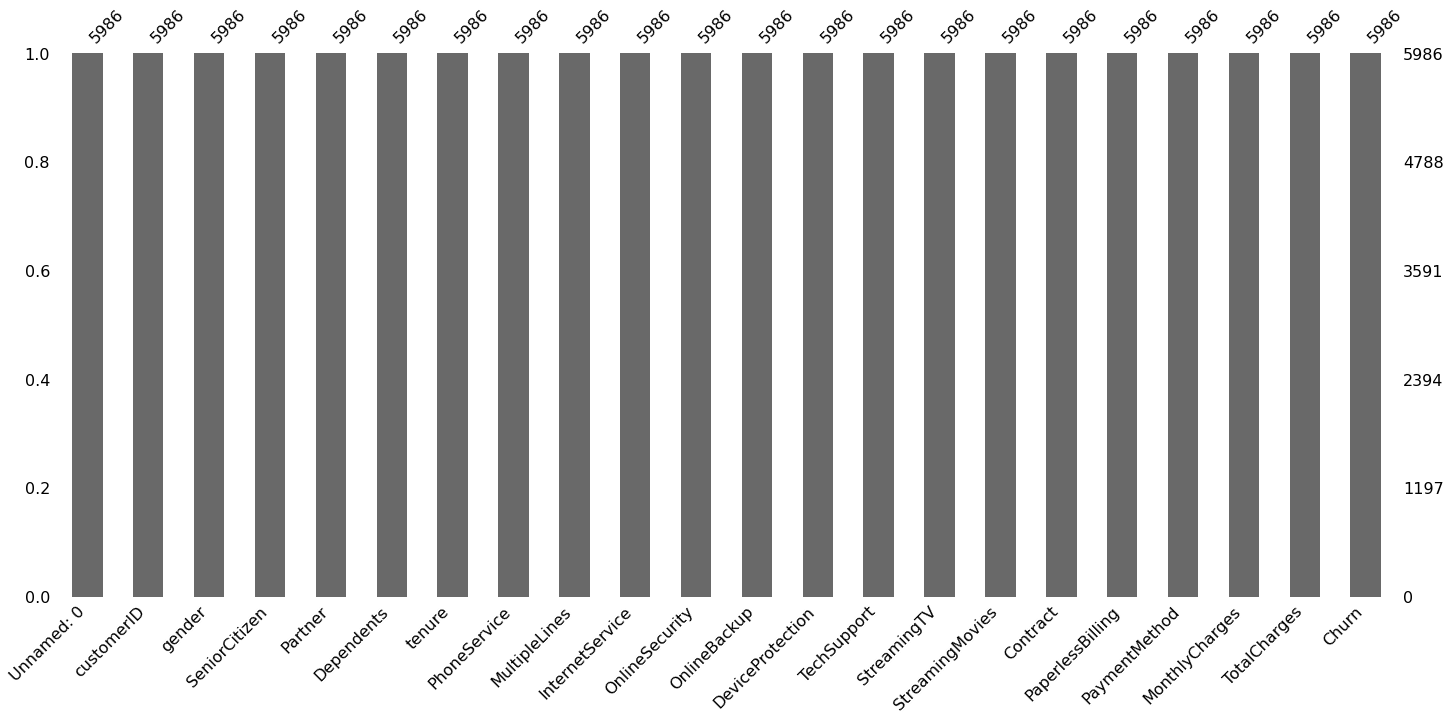

In [6]:
#Посмотрим на пропущенные значения
import missingno as msng
msng.bar(main_df)

<BarContainer object of 2 artists>

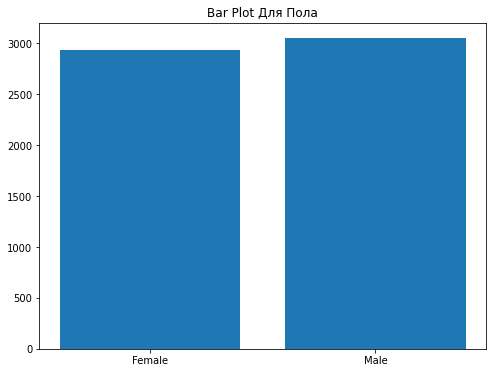

In [7]:
#Посмотрим на количество мужчин и женщин и их разницу
tmp_df = main_df.groupby(['gender']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot Для Пола")
plt.bar(tmp_df['gender'], tmp_df[0])

<BarContainer object of 2 artists>

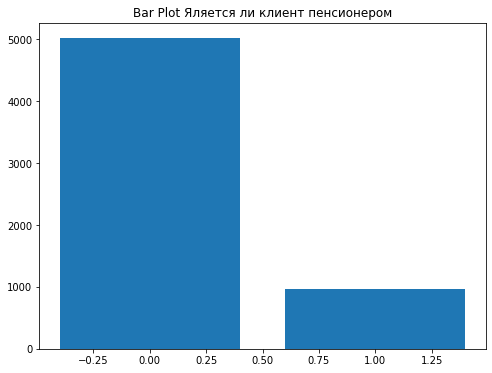

In [8]:
tmp_df = main_df.groupby(['SeniorCitizen']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot Яляется ли клиент пенсионером")
plt.bar(tmp_df['SeniorCitizen'], tmp_df[0])

<BarContainer object of 2 artists>

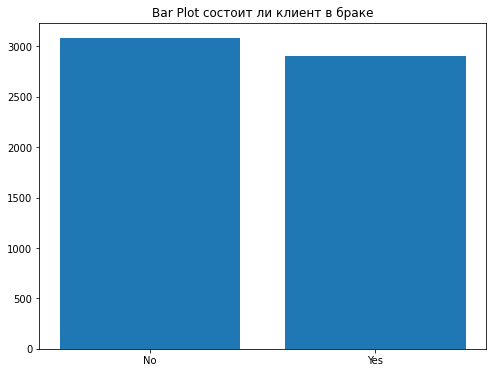

In [9]:
#Partner – состоит ли клиент в браке (Yes, No)
tmp_df = main_df.groupby(['Partner']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot состоит ли клиент в браке")
plt.bar(tmp_df['Partner'], tmp_df[0])

<BarContainer object of 2 artists>

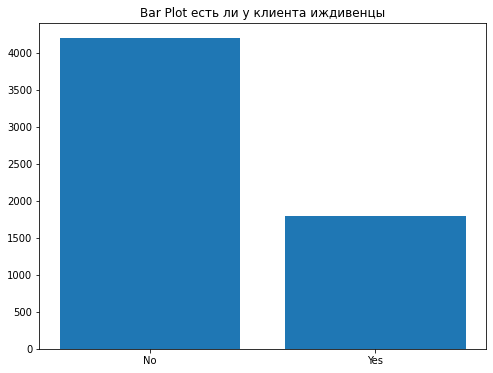

In [10]:
#Dependents – есть ли у клиента иждивенцы (Yes, No)
tmp_df = main_df.groupby(['Dependents']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot есть ли у клиента иждивенцы")
plt.bar(tmp_df['Dependents'], tmp_df[0])

(array([883., 474., 309., 331., 226., 264., 289., 182., 243., 185., 192.,
        232., 155., 229., 182., 237., 238., 199., 309., 627.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ,
        39.6, 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4, 72. ]),
 <BarContainer object of 20 artists>)

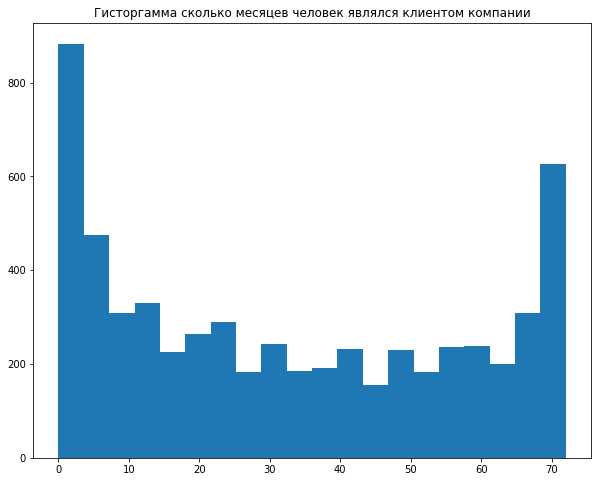

In [11]:
#tenure – сколько месяцев человек являлся клиентом компании
plt.figure(figsize=(10,8))
plt.title("Гисторгамма сколько месяцев человек являлся клиентом компании")
plt.hist(main_df['tenure'], bins=20)

<BarContainer object of 2 artists>

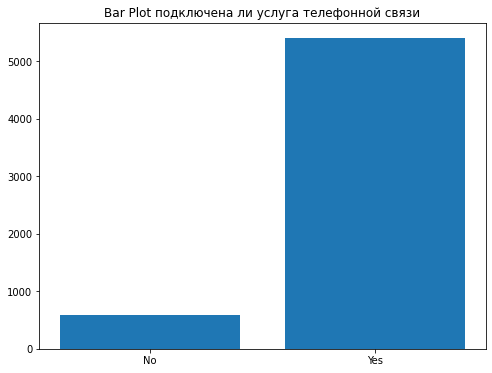

In [12]:
#PhoneService – подключена ли услуга телефонной связи (Yes, No)
tmp_df = main_df.groupby(['PhoneService']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключена ли услуга телефонной связи")
plt.bar(tmp_df['PhoneService'], tmp_df[0])

<BarContainer object of 3 artists>

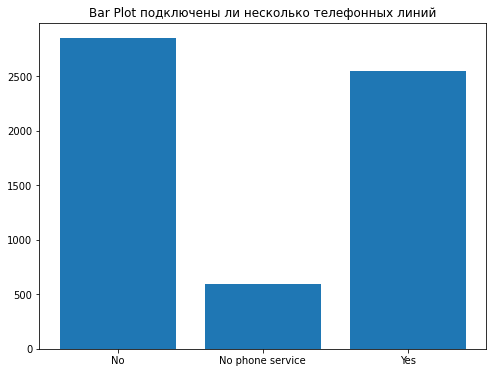

In [13]:
#MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
tmp_df = main_df.groupby(['MultipleLines']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключены ли несколько телефонных линий")
plt.bar(tmp_df['MultipleLines'], tmp_df[0])

<BarContainer object of 3 artists>

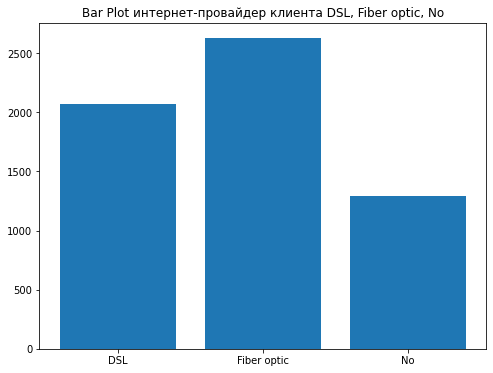

In [14]:
#InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
tmp_df = main_df.groupby(['InternetService']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot интернет-провайдер клиента DSL, Fiber optic, No")
plt.bar(tmp_df['InternetService'], tmp_df[0])

<BarContainer object of 3 artists>

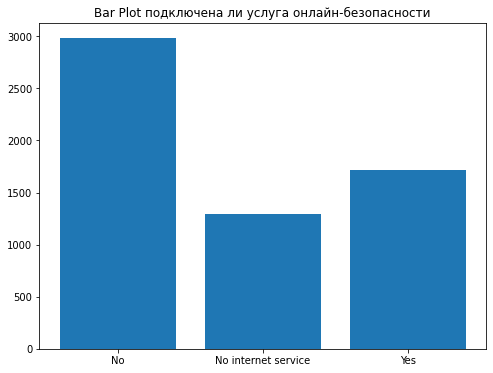

In [15]:
#OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
tmp_df = main_df.groupby(['OnlineSecurity']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключена ли услуга онлайн-безопасности")
plt.bar(tmp_df['OnlineSecurity'], tmp_df[0])

<BarContainer object of 3 artists>

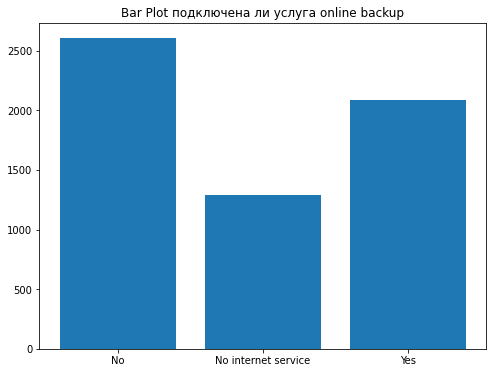

In [16]:
#OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
tmp_df = main_df.groupby(['OnlineBackup']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключена ли услуга online backup")
plt.bar(tmp_df['OnlineBackup'], tmp_df[0])

<BarContainer object of 3 artists>

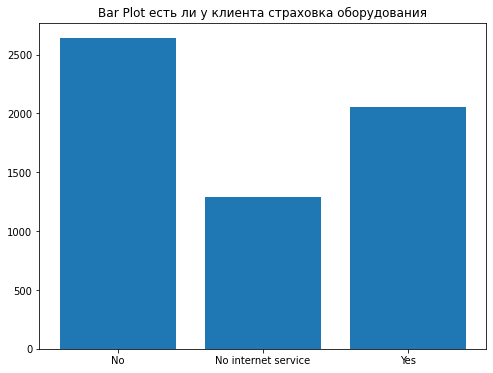

In [17]:
#DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
tmp_df = main_df.groupby(['DeviceProtection']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot есть ли у клиента страховка оборудования")
plt.bar(tmp_df['DeviceProtection'], tmp_df[0])

<BarContainer object of 3 artists>

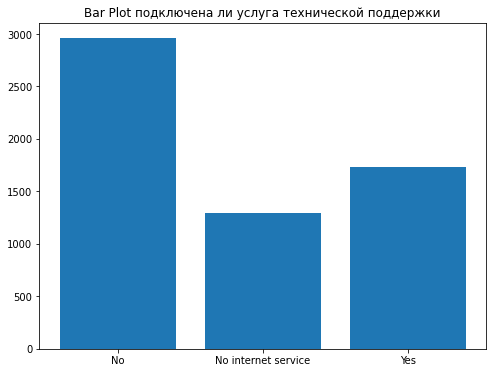

In [18]:
#TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
tmp_df = main_df.groupby(['TechSupport']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключена ли услуга технической поддержки")
plt.bar(tmp_df['TechSupport'], tmp_df[0])

<BarContainer object of 3 artists>

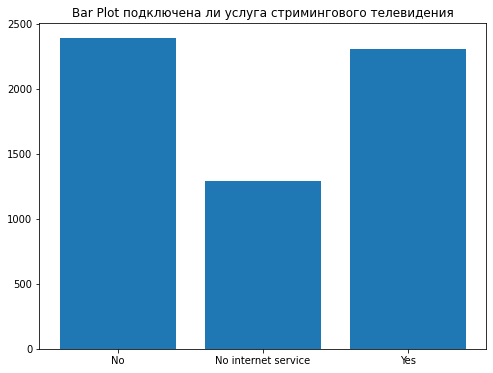

In [19]:
#StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
tmp_df = main_df.groupby(['StreamingTV']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключена ли услуга стримингового телевидения")
plt.bar(tmp_df['StreamingTV'], tmp_df[0])

<BarContainer object of 3 artists>

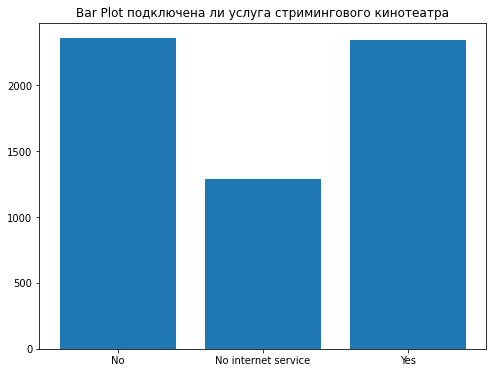

In [20]:
#StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
tmp_df = main_df.groupby(['StreamingMovies']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot подключена ли услуга стримингового кинотеатра")
plt.bar(tmp_df['StreamingMovies'], tmp_df[0])

<BarContainer object of 3 artists>

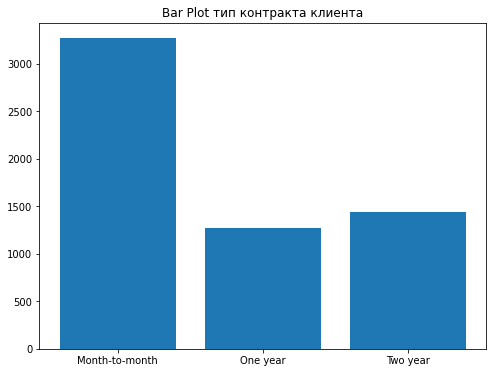

In [21]:
#Contract – тип контракта клиента (Month-to-month, One year, Two year)
tmp_df = main_df.groupby(['Contract']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot тип контракта клиента")
plt.bar(tmp_df['Contract'], tmp_df[0])

<BarContainer object of 2 artists>

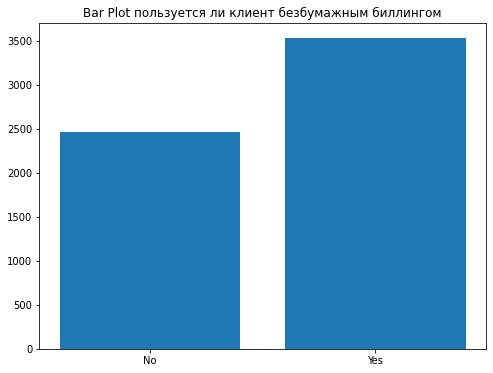

In [22]:
#PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
tmp_df = main_df.groupby(['PaperlessBilling']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot пользуется ли клиент безбумажным биллингом")
plt.bar(tmp_df['PaperlessBilling'], tmp_df[0])

<BarContainer object of 4 artists>

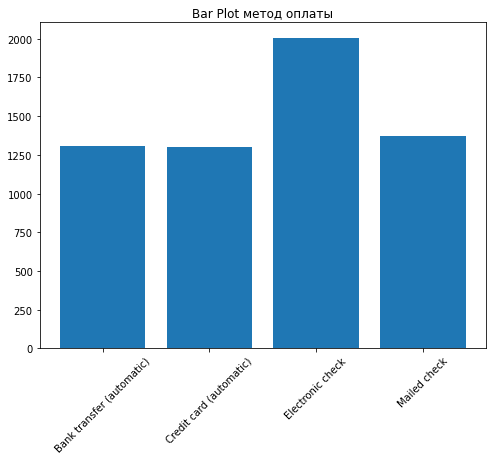

In [23]:
#PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
tmp_df = main_df.groupby(['PaymentMethod']).size().reset_index()
plt.figure(figsize=(8,6))
plt.title("Bar Plot метод оплаты")
plt.xticks(rotation=45) 
plt.bar(tmp_df['PaymentMethod'], tmp_df[0])

(array([999., 361.,  77.,  87.,  92., 225., 265., 285., 199., 186., 370.,
        393., 430., 379., 372., 361., 340., 313., 167.,  85.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <BarContainer object of 20 artists>)

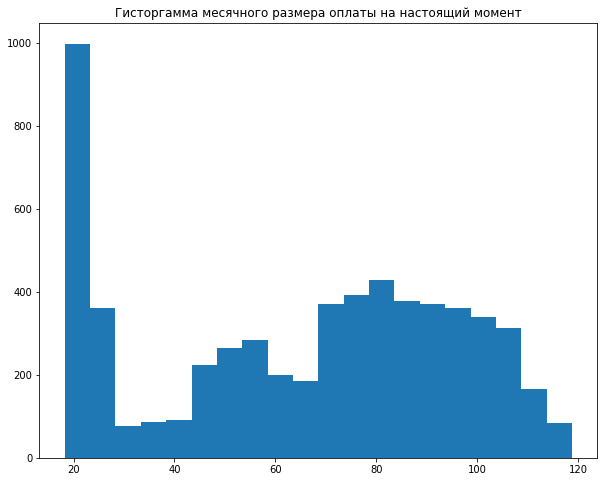

In [24]:
#MonthlyCharges – месячный размер оплаты на настоящий момент
plt.figure(figsize=(10,8))
plt.title("Гисторгамма месячного размера оплаты на настоящий момент")
plt.hist(main_df['MonthlyCharges'], bins=20)

<BarContainer object of 2 artists>

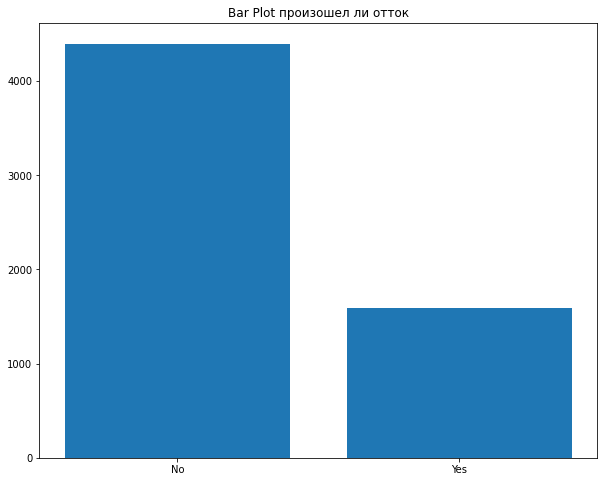

In [25]:
#Churn – произошел ли отток (Yes or No)
tmp_df = main_df.groupby(['Churn']).size().reset_index()
plt.figure(figsize=(10,8))
plt.title("Bar Plot произошел ли отток")
plt.bar(tmp_df['Churn'], tmp_df[0])

Классификация двух неравномерно сбалансированных классов

# 2. Исследование зависимостей и формулирование гипотез

In [26]:
main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService       OnlineSecurity  \
0          Yes           Yes              No  No internet service   
1          Yes            No     Fiber optic                   No   
2          Yes           Yes     Fiber optic                   No   
3          Yes            No             DSL                   No   
4          Yes            No             DSL                  Yes   

          OnlineBackup     DeviceProtection          TechSupport  \
0  No internet service  No internet service  No internet service   
1                  Yes                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                   No   
4                   No                  Yes                   No   

           StreamingTV      StreamingMovies        Contract PaperlessBilling  \
0  No internet service  No internet service        Two year               No   
1                  Yes                   No  Month-to-month              Yes   
2                   No                   No  Month-to-month              Yes   
3                   No                  Yes  Month-to-month              Yes   
4                   No                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No

Первые попытки прогнозирования оттока

<BarContainer object of 4 artists>

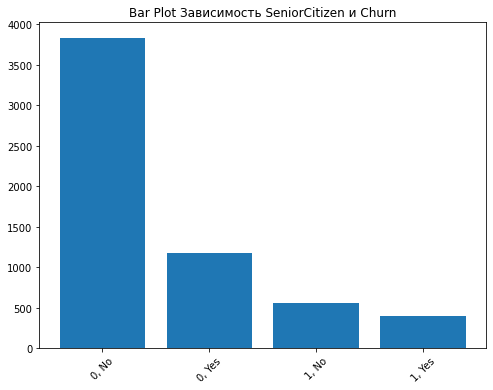

In [27]:
tmp_df = main_df.groupby(['SeniorCitizen', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["SeniorCitizen"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость SeniorCitizen и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [28]:
pd.crosstab(main_df['SeniorCitizen'],main_df['Churn'], normalize=True)

Churn                No       Yes
SeniorCitizen                    
0              0.640662  0.197962
1              0.094220  0.067157

In [29]:
tmp_df = main_df[main_df['SeniorCitizen'] == 1]
pd.crosstab(tmp_df['SeniorCitizen'],tmp_df['Churn'], normalize=True)

Churn                No       Yes
SeniorCitizen                    
1              0.583851  0.416149

Очень большой процент оттока если человек на пенсии

In [30]:
tmp_df = main_df[main_df['SeniorCitizen'] == 0]
pd.crosstab(tmp_df['SeniorCitizen'],tmp_df['Churn'], normalize=True)

Churn                No       Yes
SeniorCitizen                    
0              0.763944  0.236056

№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

In [31]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_main_df = main_df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
object_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'Churn'
              ]

for col in object_cols:
    label_main_df[col] = label_encoder.fit_transform(main_df[col])
    
label_main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        1869  7010-BRBUU       1              0        1           1      72   
1        4528  9688-YGXVR       0              0        0           0      44   
2        6344  9286-DOJGF       0              1        1           0      38   
3        6739  6994-KERXL       1              0        0           0       4   
4         432  2181-UAESM       1              0        0           0       2   

   PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0             1              2              No               1             1   
1             1              0     Fiber optic               0             2   
2             1              2     Fiber optic               0             0   
3             1              0             DSL               0             0   
4             1              0             DSL               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 1            1            1                1   
1                 2            0            2                0   
2                 0            0            0                0   
3                 0            0            0                2   
4                 2            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0        Two year                 0    Credit card (automatic)   
1  Month-to-month                 1    Credit card (automatic)   
2  Month-to-month                 1  Bank transfer (automatic)   
3  Month-to-month                 1           Electronic check   
4  Month-to-month                 0           Electronic check   

   MonthlyCharges TotalCharges  Churn  
0           24.10      1734.65      0  
1           88.15       3973.2      0  
2           74.95      2869.85      1  
3           55.90        238.5      0  
4           53.45        119.5      0

In [32]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(label_main_df[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = label_main_df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = label_main_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_main_df = pd.concat([num_X_train, OH_cols_train], axis=1)

OH_main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        1869  7010-BRBUU       1              0        1           1      72   
1        4528  9688-YGXVR       0              0        0           0      44   
2        6344  9286-DOJGF       0              1        1           0      38   
3        6739  6994-KERXL       1              0        0           0       4   
4         432  2181-UAESM       1              0        0           0       2   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0             1              2               1             1   
1             1              0               0             2   
2             1              2               0             0   
3             1              0               0             0   
4             1              0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 1            1            1                1   
1                 2            0            2                0   
2                 0            0            0                0   
3                 0            0            0                2   
4                 2            0            0                0   

   PaperlessBilling  MonthlyCharges TotalCharges  Churn    0    1    2    3  \
0                 0           24.10      1734.65      0  0.0  0.0  1.0  0.0   
1                 1           88.15       3973.2      0  0.0  1.0  0.0  1.0   
2                 1           74.95      2869.85      1  0.0  1.0  0.0  1.0   
3                 1           55.90        238.5      0  1.0  0.0  0.0  1.0   
4                 0           53.45        119.5      0  1.0  0.0  0.0  1.0   

     4    5    6    7    8    9  
0  0.0  1.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0

In [33]:
object_cols = ['Unnamed: 0', 'customerID', 'TotalCharges']
df = OH_main_df.drop(object_cols, axis=1)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   
3       1              0        0           0       4             1   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              2               1             1                 1            1   
1              0               0             2                 2            0   
2              2               0             0                 0            0   
3              0               0             0                 0            0   
4              0               2             0                 2            0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  Churn    0  \
0            1                1                 0           24.10      0  0.0   
1            2                0                 1           88.15      0  0.0   
2            0                0                 1           74.95      1  0.0   
3            0                2                 1           55.90      0  1.0   
4            0                0                 0           53.45      0  1.0   

     1    2    3    4    5    6    7    8    9  
0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
1  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0

In [34]:
for i in range(10):
    tmp = df[i].astype('int32')
    object_cols = [i]
    df = df.drop(object_cols, axis=1)
    df[str(i)] = tmp
    
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   
3       1              0        0           0       4             1   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              2               1             1                 1            1   
1              0               0             2                 2            0   
2              2               0             0                 0            0   
3              0               0             0                 0            0   
4              0               2             0                 2            0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  Churn  0  \
0            1                1                 0           24.10      0  0   
1            2                0                 1           88.15      0  0   
2            0                0                 1           74.95      1  0   
3            0                2                 1           55.90      0  1   
4            0                0                 0           53.45      0  1   

   1  2  3  4  5  6  7  8  9  
0  0  1  0  0  1  0  1  0  0  
1  1  0  1  0  0  0  1  0  0  
2  1  0  1  0  0  1  0  0  0  
3  0  0  1  0  0  0  0  1  0  
4  0  0  1  0  0  0  0  1  0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int32  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int32  
 3   Dependents        5986 non-null   int32  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int32  
 6   MultipleLines     5986 non-null   int32  
 7   OnlineSecurity    5986 non-null   int32  
 8   OnlineBackup      5986 non-null   int32  
 9   DeviceProtection  5986 non-null   int32  
 10  TechSupport       5986 non-null   int32  
 11  StreamingTV       5986 non-null   int32  
 12  StreamingMovies   5986 non-null   int32  
 13  PaperlessBilling  5986 non-null   int32  
 14  MonthlyCharges    5986 non-null   float64
 15  Churn             5986 non-null   int32  
 16  0                 5986 non-null   int32  


№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

После преобразования наших данных вернемся к исследованию

In [36]:
#какова доля людей нелояльных пользователей в нашем датафрейме?
df['Churn'].mean()

0.2651186100902105

26,5% — довольно плохой показатель для компании, с таким процентом оттока можно и разориться. 

**Partner – состоит ли клиент в браке (Yes, No)**

<BarContainer object of 4 artists>

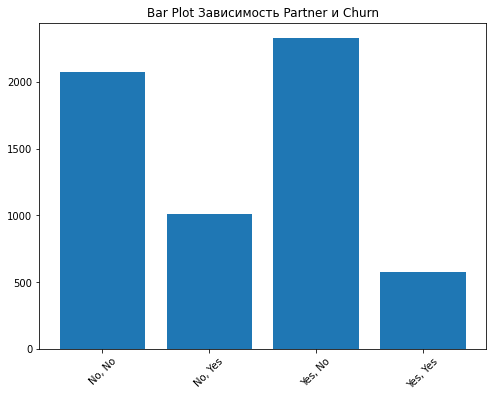

In [37]:
tmp_df = main_df.groupby(['Partner', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["Partner"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость Partner и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [38]:
pd.crosstab(main_df['Partner'],main_df['Churn'], normalize=True)

Churn          No       Yes
Partner                    
No       0.345974  0.168894
Yes      0.388907  0.096225

In [39]:
tmp_df = main_df[main_df['Partner'] == 'Yes']
pd.crosstab(tmp_df['Partner'],tmp_df['Churn'], normalize=True)

Churn          No       Yes
Partner                    
Yes      0.801653  0.198347

In [40]:
tmp_df = main_df[main_df['Partner'] == 'No']
pd.crosstab(tmp_df['Partner'],tmp_df['Churn'], normalize=True)

Churn          No       Yes
Partner                    
No       0.671966  0.328034

Если человек состоит в браке, то вероятность, что произойдет отток меньше чем он будет холост
Большой процент оттока среди холостых

**Dependents – есть ли у клиента иждивенцы (Yes, No)**

<BarContainer object of 4 artists>

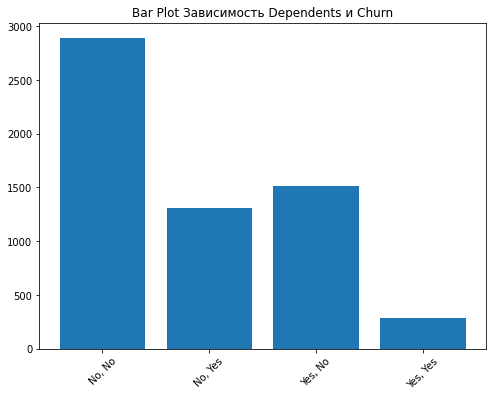

In [41]:
tmp_df = main_df.groupby(['Dependents', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["Dependents"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость Dependents и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [42]:
pd.crosstab(main_df['Dependents'],main_df['Churn'], normalize=True)

Churn             No       Yes
Dependents                    
No          0.482626  0.218176
Yes         0.252255  0.046943

In [43]:
tmp_df = main_df[main_df['Dependents'] == 'Yes']
pd.crosstab(tmp_df['Dependents'],tmp_df['Churn'], normalize=True)

Churn             No       Yes
Dependents                    
Yes         0.843104  0.156896

In [44]:
tmp_df = main_df[main_df['Dependents'] == 'No']
pd.crosstab(tmp_df['Dependents'],tmp_df['Churn'], normalize=True)

Churn             No       Yes
Dependents                    
No          0.688677  0.311323

Существование иждевенцов вынуждает отказаться от услуг в 31% случае

**tenure – сколько месяцев человек являлся клиентом компании**

(array([379., 272., 196., 222., 155., 200., 217., 147., 184., 150., 150.,
        179., 133., 187., 155., 200., 209., 189., 273., 602.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ,
        39.6, 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4, 72. ]),
 <BarContainer object of 20 artists>)

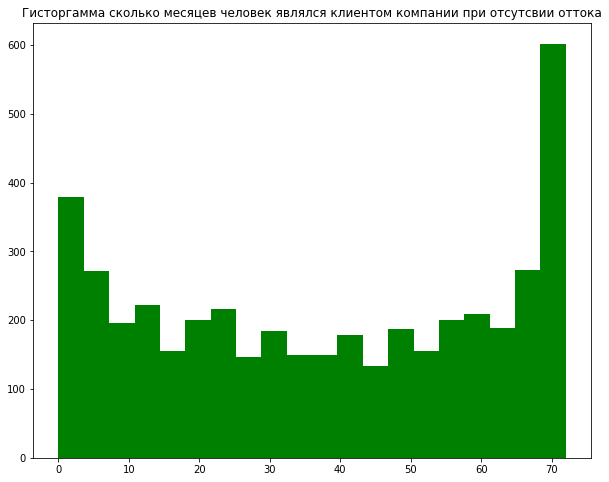

In [45]:
plt.figure(figsize=(10,8))
plt.title("Гисторгамма сколько месяцев человек являлся клиентом компании при отсутсвии оттока")
plt.hist(main_df[main_df['Churn'] == 'No']['tenure'], bins=20, color='green')

(array([504., 125., 114.,  76.,  60.,  77.,  43.,  34.,  53.,  30.,  43.,
         25.,  28.,  39.,  22.,  22.,  36.,  28.,  10.,  32.,  22.,  27.,
         20.,  17.,  23.,  11.,   5.,  28.,  14.,  19.]),
 array([ 1.        ,  3.36666667,  5.73333333,  8.1       , 10.46666667,
        12.83333333, 15.2       , 17.56666667, 19.93333333, 22.3       ,
        24.66666667, 27.03333333, 29.4       , 31.76666667, 34.13333333,
        36.5       , 38.86666667, 41.23333333, 43.6       , 45.96666667,
        48.33333333, 50.7       , 53.06666667, 55.43333333, 57.8       ,
        60.16666667, 62.53333333, 64.9       , 67.26666667, 69.63333333,
        72.        ]),
 <BarContainer object of 30 artists>)

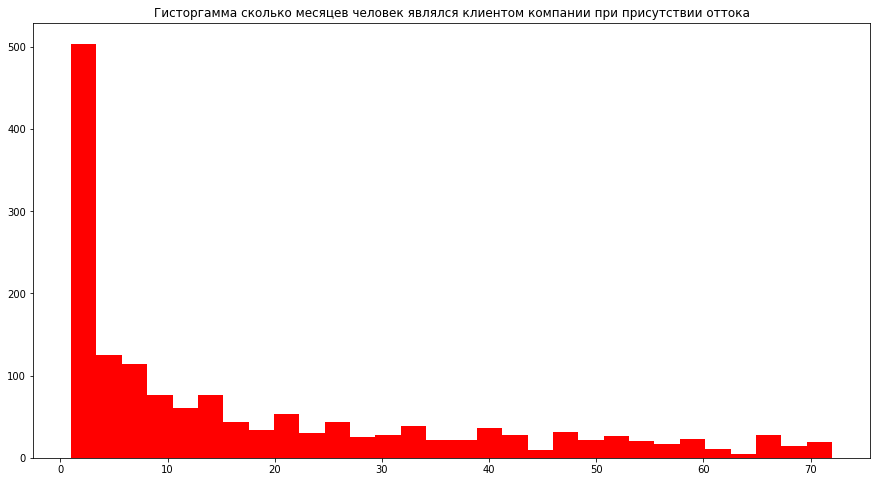

In [46]:
plt.figure(figsize=(15,8))
plt.title("Гисторгамма сколько месяцев человек являлся клиентом компании при присутствии оттока")
plt.hist(main_df[main_df['Churn'] == 'Yes']['tenure'], bins=30, color='red')

In [47]:
print("Среднее по кол-ву месяцев", main_df[main_df['Churn'] == 'Yes']['tenure'].mean())
print("Максимум по кол-ву месяцев", main_df[main_df['Churn'] == 'Yes']['tenure'].max())
print("Минимум по кол-ву месяцев", main_df[main_df['Churn'] == 'Yes']['tenure'].min())

Среднее по кол-ву месяцев 18.246376811594203
Максимум по кол-ву месяцев 72
Минимум по кол-ву месяцев 1


In [48]:
main_df[main_df['Churn'] == 'Yes']['tenure'].describe()

count    1587.000000
mean       18.246377
std        19.667262
min         1.000000
25%         2.000000
50%        10.000000
75%        30.000000
max        72.000000
Name: tenure, dtype: float64

Как мы можем видеть по гистограмме, основной отток происходит в первые месяцы использования 

**PhoneService – подключена ли услуга телефонной связи (Yes, No)**

<BarContainer object of 4 artists>

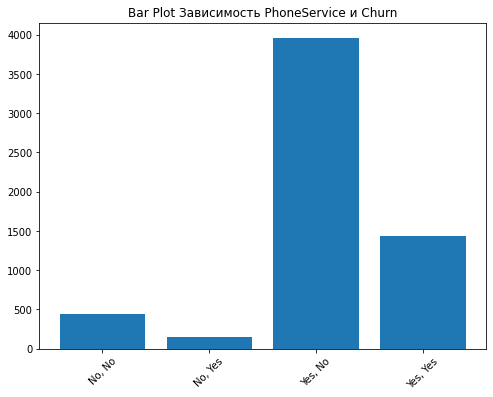

In [49]:
tmp_df = main_df.groupby(['PhoneService', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["PhoneService"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость PhoneService и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [50]:
pd.crosstab(main_df['PhoneService'],main_df['Churn'], normalize=True)

Churn               No       Yes
PhoneService                    
No            0.073672  0.024891
Yes           0.661209  0.240227

In [51]:
tmp_df = main_df[main_df['PhoneService'] == 'Yes']
pd.crosstab(tmp_df['PhoneService'],tmp_df['Churn'], normalize=True)

Churn               No       Yes
PhoneService                    
Yes           0.733506  0.266494

In [52]:
tmp_df = main_df[main_df['PhoneService'] == 'No']
pd.crosstab(tmp_df['PhoneService'],tmp_df['Churn'], normalize=True)

Churn               No       Yes
PhoneService                    
No            0.747458  0.252542

Хоть кол-во клиентов с неподключенной услугой моб связи мала, но если взглянуть на процент оттока, то разницы нет, подключена ли эта услуга или нет, значения одни и те же. Можно предположить, что переменная не играет важную роль

**MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)**

<BarContainer object of 6 artists>

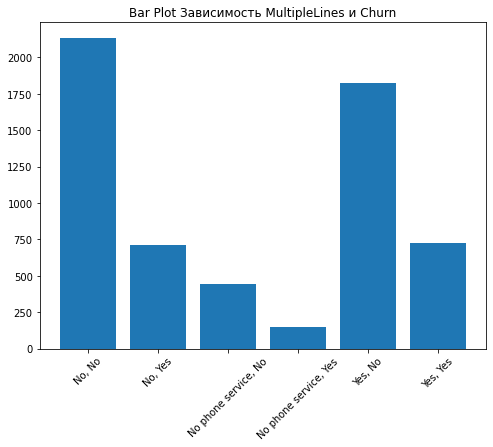

In [53]:
tmp_df = main_df.groupby(['MultipleLines', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["MultipleLines"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость MultipleLines и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [54]:
pd.crosstab(main_df['MultipleLines'],main_df['Churn'], normalize=True)

Churn                   No       Yes
MultipleLines                       
No                0.356331  0.119445
No phone service  0.073672  0.024891
Yes               0.304878  0.120782

In [55]:
tmp_df = main_df[main_df['MultipleLines'] == 'Yes']
pd.crosstab(tmp_df['MultipleLines'],tmp_df['Churn'], normalize=True)

Churn                No       Yes
MultipleLines                    
Yes            0.716248  0.283752

In [56]:
tmp_df = main_df[main_df['MultipleLines'] == 'No']
pd.crosstab(tmp_df['MultipleLines'],tmp_df['Churn'], normalize=True)

Churn                No       Yes
MultipleLines                    
No             0.748947  0.251053

In [57]:
tmp_df = main_df[main_df['MultipleLines'] == 'No phone service']
pd.crosstab(tmp_df['MultipleLines'],tmp_df['Churn'], normalize=True)

Churn                   No       Yes
MultipleLines                       
No phone service  0.747458  0.252542

Аналагично предыдущей, столбец MultipleLines не влияет на отток

**InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)**

<BarContainer object of 6 artists>

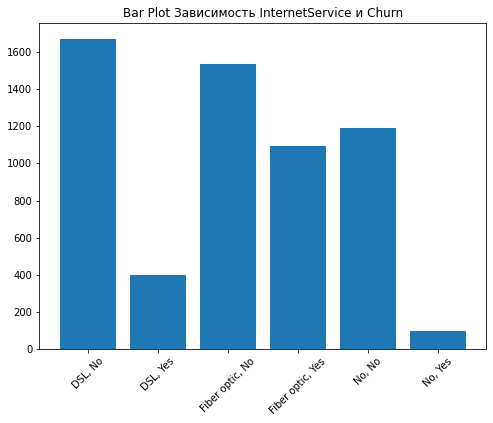

In [58]:
tmp_df = main_df.groupby(['InternetService', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["InternetService"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость InternetService и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [59]:
pd.crosstab(main_df['InternetService'],main_df['Churn'], normalize=True)

Churn                  No       Yes
InternetService                    
DSL              0.279151  0.066321
Fiber optic      0.256599  0.182259
No               0.199131  0.016539

In [60]:
tmp_df = main_df[main_df['InternetService'] == 'DSL']
pd.crosstab(tmp_df['InternetService'],tmp_df['Churn'], normalize=True)

Churn                  No       Yes
InternetService                    
DSL              0.808027  0.191973

In [61]:
tmp_df = main_df[main_df['InternetService'] == 'Fiber optic']
pd.crosstab(tmp_df['InternetService'],tmp_df['Churn'], normalize=True)

Churn                  No       Yes
InternetService                    
Fiber optic      0.584697  0.415303

In [62]:
tmp_df = main_df[main_df['InternetService'] == 'No']
pd.crosstab(tmp_df['InternetService'],tmp_df['Churn'], normalize=True)

Churn                  No       Yes
InternetService                    
No               0.923315  0.076685

Безумный отток при подключении интернет провайдера Fiber optic, а если совсем не подключен, то он адекватный и самый минимальный. При DSL хоть и 18%, но отток тоже достаточно большой! 

**OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)**

<BarContainer object of 6 artists>

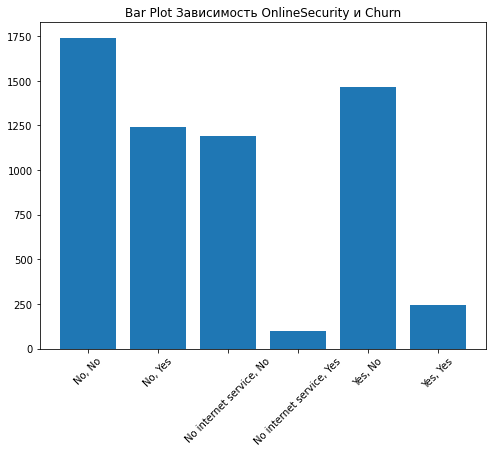

In [63]:
tmp_df = main_df.groupby(['OnlineSecurity', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["OnlineSecurity"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость OnlineSecurity и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [64]:
pd.crosstab(main_df['OnlineSecurity'],main_df['Churn'], normalize=True)

Churn                      No       Yes
OnlineSecurity                         
No                   0.290678  0.207484
No internet service  0.199131  0.016539
Yes                  0.245072  0.041096

In [65]:
tmp_df = main_df[main_df['OnlineSecurity'] == 'No']
pd.crosstab(tmp_df['OnlineSecurity'],tmp_df['Churn'], normalize=True)

Churn                 No       Yes
OnlineSecurity                    
No              0.583501  0.416499

In [66]:
tmp_df = main_df[main_df['OnlineSecurity'] == 'No internet service']
pd.crosstab(tmp_df['OnlineSecurity'],tmp_df['Churn'], normalize=True)

Churn                      No       Yes
OnlineSecurity                         
No internet service  0.923315  0.076685

In [67]:
tmp_df = main_df[main_df['OnlineSecurity'] == 'Yes']
pd.crosstab(tmp_df['OnlineSecurity'],tmp_df['Churn'], normalize=True)

Churn                 No       Yes
OnlineSecurity                    
Yes             0.856392  0.143608

Клиенты с подключенной услугой онлайн-безопасности - в 42% случаях уходят!

**OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)**

<BarContainer object of 6 artists>

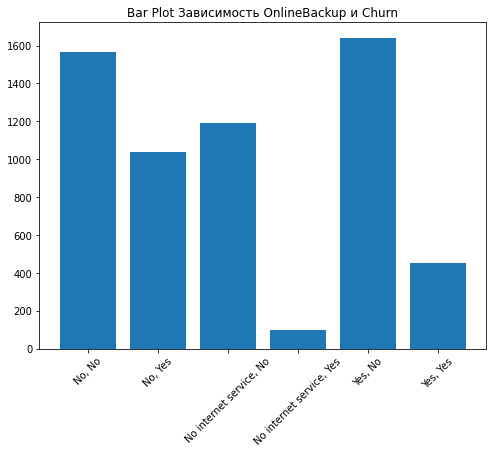

In [68]:
tmp_df = main_df.groupby(['OnlineBackup', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["OnlineBackup"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость OnlineBackup и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [69]:
pd.crosstab(main_df['OnlineBackup'],main_df['Churn'], normalize=True)

Churn                      No       Yes
OnlineBackup                           
No                   0.261777  0.173405
No internet service  0.199131  0.016539
Yes                  0.273973  0.075175

In [70]:
tmp_df = main_df[main_df['OnlineBackup'] == 'No']
pd.crosstab(tmp_df['OnlineBackup'],tmp_df['Churn'], normalize=True)

Churn               No       Yes
OnlineBackup                    
No            0.601536  0.398464

In [71]:
tmp_df = main_df[main_df['OnlineBackup'] == 'No internet service']
pd.crosstab(tmp_df['OnlineBackup'],tmp_df['Churn'], normalize=True)

Churn                      No       Yes
OnlineBackup                           
No internet service  0.923315  0.076685

In [72]:
tmp_df = main_df[main_df['OnlineBackup'] == 'Yes']
pd.crosstab(tmp_df['OnlineBackup'],tmp_df['Churn'], normalize=True)

Churn               No       Yes
OnlineBackup                    
Yes           0.784689  0.215311

Большой отток при подключенном и не подключенном сервисе OnlineBackup, если No internet service - показатель минимальный

**DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)**

<BarContainer object of 6 artists>

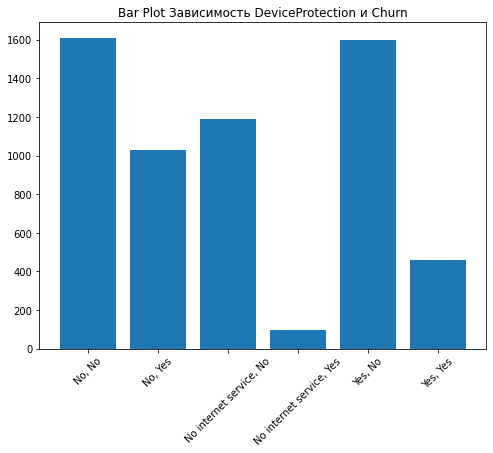

In [73]:
tmp_df = main_df.groupby(['DeviceProtection', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["DeviceProtection"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость DeviceProtection и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [74]:
pd.crosstab(main_df['DeviceProtection'],main_df['Churn'], normalize=True)

Churn                      No       Yes
DeviceProtection                       
No                   0.268794  0.172235
No internet service  0.199131  0.016539
Yes                  0.266956  0.076345

In [75]:
tmp_df = main_df[main_df['DeviceProtection'] == 'No']
pd.crosstab(tmp_df['DeviceProtection'],tmp_df['Churn'], normalize=True)

Churn                  No      Yes
DeviceProtection                  
No                0.60947  0.39053

In [76]:
tmp_df = main_df[main_df['DeviceProtection'] == 'No internet service']
pd.crosstab(tmp_df['DeviceProtection'],tmp_df['Churn'], normalize=True)

Churn                      No       Yes
DeviceProtection                       
No internet service  0.923315  0.076685

In [77]:
tmp_df = main_df[main_df['DeviceProtection'] == 'Yes']
pd.crosstab(tmp_df['DeviceProtection'],tmp_df['Churn'], normalize=True)

Churn                   No       Yes
DeviceProtection                    
Yes               0.777616  0.222384

**TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)**

<BarContainer object of 6 artists>

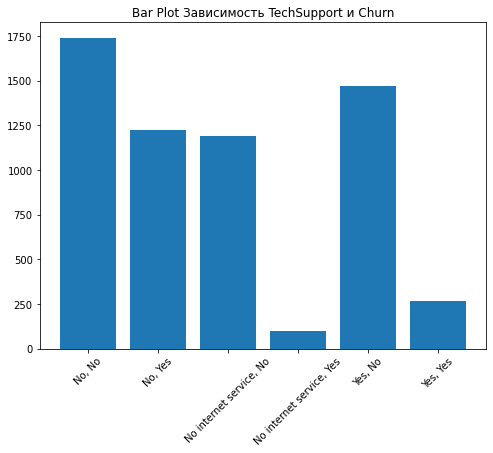

In [78]:
tmp_df = main_df.groupby(['TechSupport', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["TechSupport"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость TechSupport и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [79]:
pd.crosstab(main_df['TechSupport'],main_df['Churn'], normalize=True)

Churn                      No       Yes
TechSupport                            
No                   0.290344  0.204143
No internet service  0.199131  0.016539
Yes                  0.245406  0.044437

In [80]:
tmp_df = main_df[main_df['TechSupport'] == 'No']
pd.crosstab(tmp_df['TechSupport'],tmp_df['Churn'], normalize=True)

Churn              No       Yes
TechSupport                    
No           0.587162  0.412838

In [81]:
tmp_df = main_df[main_df['TechSupport'] == 'No internet service']
pd.crosstab(tmp_df['TechSupport'],tmp_df['Churn'], normalize=True)

Churn                      No       Yes
TechSupport                            
No internet service  0.923315  0.076685

In [82]:
tmp_df = main_df[main_df['TechSupport'] == 'Yes']
pd.crosstab(tmp_df['TechSupport'],tmp_df['Churn'], normalize=True)

Churn              No       Yes
TechSupport                    
Yes          0.846686  0.153314

**StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)**

<BarContainer object of 6 artists>

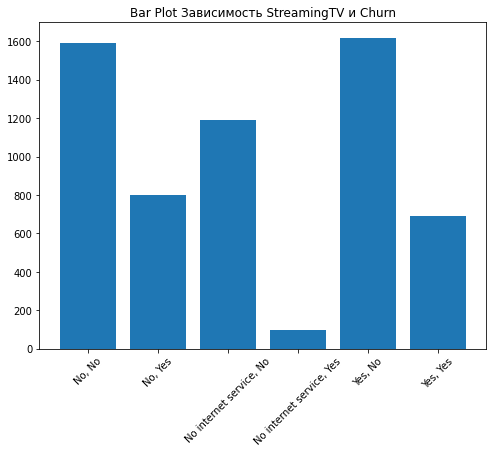

In [83]:
tmp_df = main_df.groupby(['StreamingTV', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["StreamingTV"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость StreamingTV и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [84]:
pd.crosstab(main_df['StreamingTV'],main_df['Churn'], normalize=True)

Churn                      No       Yes
StreamingTV                            
No                   0.265620  0.133478
No internet service  0.199131  0.016539
Yes                  0.270130  0.115102

In [85]:
tmp_df = main_df[main_df['StreamingTV'] == 'No']
pd.crosstab(tmp_df['StreamingTV'],tmp_df['Churn'], normalize=True)

Churn             No      Yes
StreamingTV                  
No           0.66555  0.33445

In [86]:
tmp_df = main_df[main_df['StreamingTV'] == 'No internet service']
pd.crosstab(tmp_df['StreamingTV'],tmp_df['Churn'], normalize=True)

Churn                      No       Yes
StreamingTV                            
No internet service  0.923315  0.076685

In [87]:
tmp_df = main_df[main_df['StreamingTV'] == 'Yes']
pd.crosstab(tmp_df['StreamingTV'],tmp_df['Churn'], normalize=True)

Churn              No       Yes
StreamingTV                    
Yes          0.701214  0.298786

**StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)**

<BarContainer object of 6 artists>

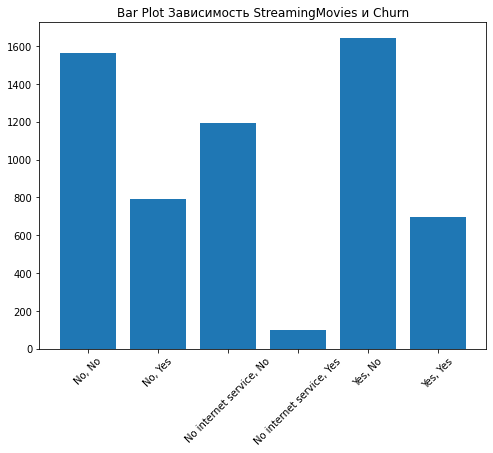

In [88]:
tmp_df = main_df.groupby(['StreamingMovies', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["StreamingMovies"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость StreamingMovies и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [89]:
pd.crosstab(main_df['StreamingMovies'],main_df['Churn'], normalize=True)

Churn                      No       Yes
StreamingMovies                        
No                   0.261276  0.132309
No internet service  0.199131  0.016539
Yes                  0.274474  0.116271

In [90]:
tmp_df = main_df[main_df['StreamingMovies'] == 'No']
pd.crosstab(tmp_df['StreamingMovies'],tmp_df['Churn'], normalize=True)

Churn                  No       Yes
StreamingMovies                    
No               0.663837  0.336163

In [91]:
tmp_df = main_df[main_df['StreamingMovies'] == 'No internet service']
pd.crosstab(tmp_df['StreamingMovies'],tmp_df['Churn'], normalize=True)

Churn                      No       Yes
StreamingMovies                        
No internet service  0.923315  0.076685

In [92]:
tmp_df = main_df[main_df['StreamingMovies'] == 'Yes']
pd.crosstab(tmp_df['StreamingMovies'],tmp_df['Churn'], normalize=True)

Churn                  No       Yes
StreamingMovies                    
Yes              0.702437  0.297563

**Проверка зависимости StreamingMovies и StreamingTV**

In [93]:
pd.crosstab(main_df['StreamingMovies'],main_df['StreamingTV'], normalize=True)

StreamingTV                No  No internet service       Yes
StreamingMovies                                             
No                   0.285667              0.00000  0.107918
No internet service  0.000000              0.21567  0.000000
Yes                  0.113431              0.00000  0.277314

Мы видим большую корреляцию между двумя переменными, есть смысл не учитывать одну из них

**Contract – тип контракта клиента (Month-to-month, One year, Two year)**

<BarContainer object of 6 artists>

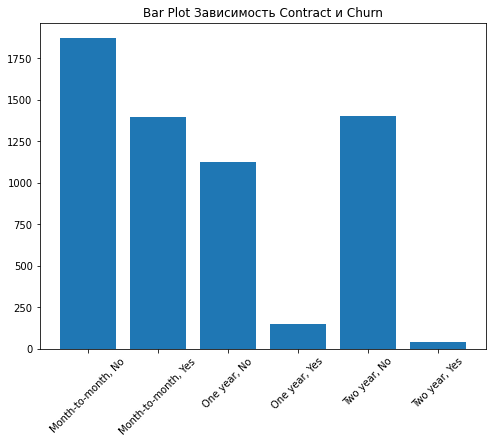

In [94]:
tmp_df = main_df.groupby(['Contract', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["Contract"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость Contract и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [95]:
pd.crosstab(main_df['Contract'],main_df['Churn'], normalize=True)

Churn                 No       Yes
Contract                          
Month-to-month  0.312563  0.233545
One year        0.188440  0.024724
Two year        0.233879  0.006849

In [96]:
tmp_df = main_df[main_df['Contract'] == 'Month-to-month']
pd.crosstab(tmp_df['Contract'],tmp_df['Churn'], normalize=True)

Churn                 No       Yes
Contract                          
Month-to-month  0.572346  0.427654

In [97]:
tmp_df = main_df[main_df['Contract'] == 'One year']
pd.crosstab(tmp_df['Contract'],tmp_df['Churn'], normalize=True)

Churn           No       Yes
Contract                    
One year  0.884013  0.115987

In [98]:
tmp_df = main_df[main_df['Contract'] == 'Two year']
pd.crosstab(tmp_df['Contract'],tmp_df['Churn'], normalize=True)

Churn           No       Yes
Contract                    
Two year  0.971548  0.028452

Очень хороший показатель при договоре на Two year! Большой отток при Month-to-month - 42%

**PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)**

<BarContainer object of 4 artists>

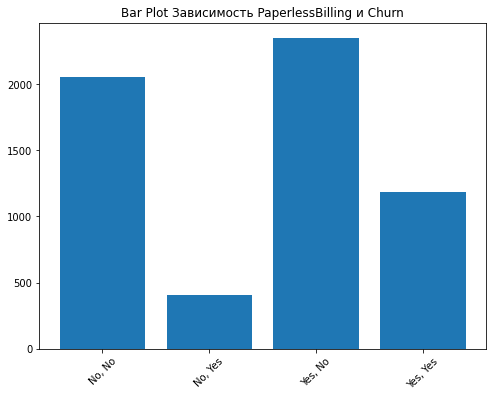

In [99]:
tmp_df = main_df.groupby(['PaperlessBilling', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["PaperlessBilling"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость PaperlessBilling и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [100]:
pd.crosstab(main_df['PaperlessBilling'],main_df['Churn'], normalize=True)

Churn                   No       Yes
PaperlessBilling                    
No                0.342800  0.067825
Yes               0.392082  0.197294

In [101]:
tmp_df = main_df[main_df['PaperlessBilling'] == 'No']
pd.crosstab(tmp_df['PaperlessBilling'],tmp_df['Churn'], normalize=True)

Churn                   No       Yes
PaperlessBilling                    
No                0.834825  0.165175

In [102]:
tmp_df = main_df[main_df['PaperlessBilling'] == 'Yes']
pd.crosstab(tmp_df['PaperlessBilling'],tmp_df['Churn'], normalize=True)

Churn                   No       Yes
PaperlessBilling                    
Yes               0.665249  0.334751

Видимо услуга безбумажного биллинга является не самой удачной! 33% оттока

**PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**

<BarContainer object of 8 artists>

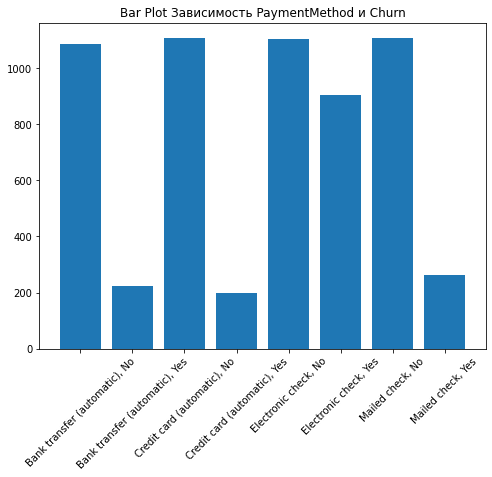

In [103]:
tmp_df = main_df.groupby(['PaymentMethod', 'Churn']).size().reset_index()
tmp_df['grouped'] = tmp_df["PaymentMethod"].astype(str) + ", " + tmp_df["Churn"].astype(str)

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) 
plt.title("Bar Plot Зависимость PaymentMethod и Churn")
plt.bar(tmp_df['grouped'], tmp_df[0])

In [104]:
pd.crosstab(main_df['PaymentMethod'],main_df['Churn'], normalize=True)

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.181089  0.037421
Credit card (automatic)    0.184597  0.033077
Electronic check           0.184430  0.150685
Mailed check               0.184764  0.043936

In [105]:
tmp_df = main_df[main_df['PaymentMethod'] == 'Bank transfer (automatic)']
pd.crosstab(tmp_df['PaymentMethod'],tmp_df['Churn'], normalize=True)

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.828746  0.171254

In [106]:
tmp_df = main_df[main_df['PaymentMethod'] == 'Credit card (automatic)']
pd.crosstab(tmp_df['PaymentMethod'],tmp_df['Churn'], normalize=True)

Churn                          No       Yes
PaymentMethod                              
Credit card (automatic)  0.848043  0.151957

In [107]:
tmp_df = main_df[main_df['PaymentMethod'] == 'Electronic check']
pd.crosstab(tmp_df['PaymentMethod'],tmp_df['Churn'], normalize=True)

Churn                   No       Yes
PaymentMethod                       
Electronic check  0.550349  0.449651

In [108]:
tmp_df = main_df[main_df['PaymentMethod'] == 'Mailed check']
pd.crosstab(tmp_df['PaymentMethod'],tmp_df['Churn'], normalize=True)

Churn                No       Yes
PaymentMethod                    
Mailed check   0.807889  0.192111

**MonthlyCharges – месячный размер оплаты на настоящий момент**

(array([999., 361.,  77.,  87.,  92., 225., 265., 285., 199., 186., 370.,
        393., 430., 379., 372., 361., 340., 313., 167.,  85.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <BarContainer object of 20 artists>)

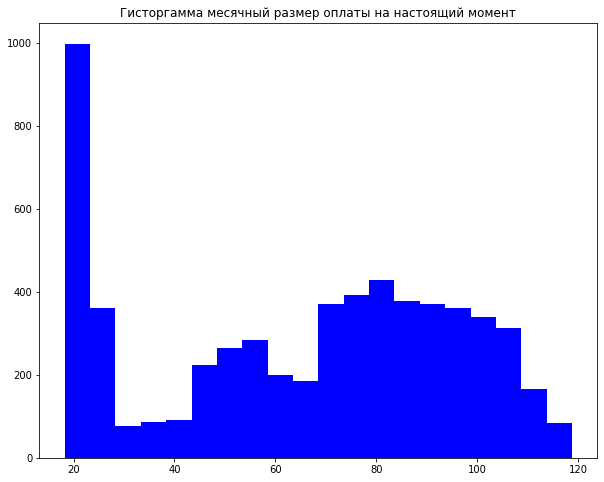

In [109]:
plt.figure(figsize=(10,8))
plt.title("Гисторгамма месячный размер оплаты на настоящий момент")
plt.hist(main_df['MonthlyCharges'], bins=20, color='blue')

(array([909., 322.,  50.,  63.,  65., 147., 194., 228., 172., 168., 230.,
        231., 280., 238., 266., 210., 200., 215., 134.,  77.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <BarContainer object of 20 artists>)

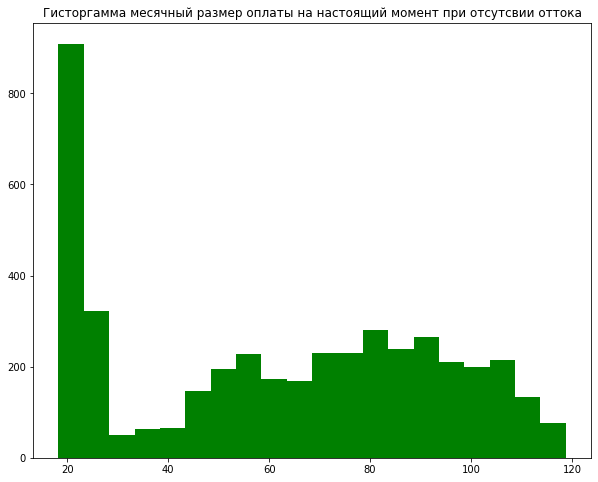

In [110]:
plt.figure(figsize=(10,8))
plt.title("Гисторгамма месячный размер оплаты на настоящий момент при отсутсвии оттока")
plt.hist(main_df[main_df['Churn'] == 'No']['MonthlyCharges'], bins=20, color='green')

(array([131.,  49., 107., 129.,  43., 301., 291., 252., 239.,  45.]),
 array([ 18.85,  28.8 ,  38.75,  48.7 ,  58.65,  68.6 ,  78.55,  88.5 ,
         98.45, 108.4 , 118.35]),
 <BarContainer object of 10 artists>)

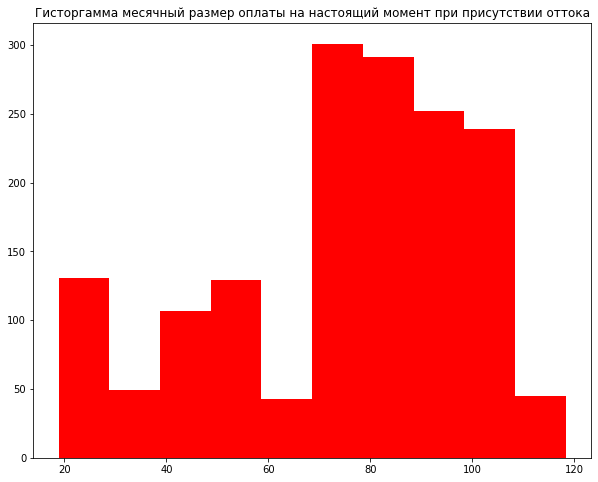

In [111]:
plt.figure(figsize=(10,8))
plt.title("Гисторгамма месячный размер оплаты на настоящий момент при присутствии оттока")
plt.hist(main_df[main_df['Churn'] == 'Yes']['MonthlyCharges'], bins=10, color='red')

# 3. Построение моделей для прогнозирования оттока

Удалим ненужные столбцы и вновь подготовим данные

In [112]:
main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService       OnlineSecurity  \
0          Yes           Yes              No  No internet service   
1          Yes            No     Fiber optic                   No   
2          Yes           Yes     Fiber optic                   No   
3          Yes            No             DSL                   No   
4          Yes            No             DSL                  Yes   

          OnlineBackup     DeviceProtection          TechSupport  \
0  No internet service  No internet service  No internet service   
1                  Yes                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                   No   
4                   No                  Yes                   No   

           StreamingTV      StreamingMovies        Contract PaperlessBilling  \
0  No internet service  No internet service        Two year               No   
1                  Yes                   No  Month-to-month              Yes   
2                   No                   No  Month-to-month              Yes   
3                   No                  Yes  Month-to-month              Yes   
4                   No                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No

In [113]:
object_cols = ['PhoneService', 'MultipleLines', 'StreamingMovies']

main_df = main_df.drop(object_cols, axis=1)
main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  InternetService       OnlineSecurity         OnlineBackup  \
0              No  No internet service  No internet service   
1     Fiber optic                   No                  Yes   
2     Fiber optic                   No                   No   
3             DSL                   No                   No   
4             DSL                  Yes                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                   No                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                   No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0        Two year               No    Credit card (automatic)           24.10   
1  Month-to-month              Yes    Credit card (automatic)           88.15   
2  Month-to-month              Yes  Bank transfer (automatic)           74.95   
3  Month-to-month              Yes           Electronic check           55.90   
4  Month-to-month               No           Electronic check           53.45   

  TotalCharges Churn  
0      1734.65    No  
1       3973.2    No  
2      2869.85   Yes  
3        238.5    No  
4        119.5    No

In [114]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_main_df = main_df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
object_cols = ['gender', 'Partner', 'Dependents',
               'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV',
               'PaperlessBilling', 'Churn'
              ]

for col in object_cols:
    label_main_df[col] = label_encoder.fit_transform(main_df[col])
    
label_main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        1869  7010-BRBUU       1              0        1           1      72   
1        4528  9688-YGXVR       0              0        0           0      44   
2        6344  9286-DOJGF       0              1        1           0      38   
3        6739  6994-KERXL       1              0        0           0       4   
4         432  2181-UAESM       1              0        0           0       2   

  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              No               1             1                 1   
1     Fiber optic               0             2                 2   
2     Fiber optic               0             0                 0   
3             DSL               0             0                 0   
4             DSL               2             0                 2   

   TechSupport  StreamingTV        Contract  PaperlessBilling  \
0            1            1        Two year                 0   
1            0            2  Month-to-month                 1   
2            0            0  Month-to-month                 1   
3            0            0  Month-to-month                 1   
4            0            0  Month-to-month                 0   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  
0    Credit card (automatic)           24.10      1734.65      0  
1    Credit card (automatic)           88.15       3973.2      0  
2  Bank transfer (automatic)           74.95      2869.85      1  
3           Electronic check           55.90        238.5      0  
4           Electronic check           53.45        119.5      0

In [115]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(label_main_df[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = label_main_df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = label_main_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_main_df = pd.concat([num_X_train, OH_cols_train], axis=1)

OH_main_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        1869  7010-BRBUU       1              0        1           1      72   
1        4528  9688-YGXVR       0              0        0           0      44   
2        6344  9286-DOJGF       0              1        1           0      38   
3        6739  6994-KERXL       1              0        0           0       4   
4         432  2181-UAESM       1              0        0           0       2   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               1             1                 1            1            1   
1               0             2                 2            0            2   
2               0             0                 0            0            0   
3               0             0                 0            0            0   
4               2             0                 2            0            0   

   PaperlessBilling  MonthlyCharges TotalCharges  Churn    0    1    2    3  \
0                 0           24.10      1734.65      0  0.0  0.0  1.0  0.0   
1                 1           88.15       3973.2      0  0.0  1.0  0.0  1.0   
2                 1           74.95      2869.85      1  0.0  1.0  0.0  1.0   
3                 1           55.90        238.5      0  1.0  0.0  0.0  1.0   
4                 0           53.45        119.5      0  1.0  0.0  0.0  1.0   

     4    5    6    7    8    9  
0  0.0  1.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0

In [116]:
object_cols = ['Unnamed: 0', 'customerID', 'TotalCharges']
df = OH_main_df.drop(object_cols, axis=1)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  \
0       1              0        1           1      72               1   
1       0              0        0           0      44               0   
2       0              1        1           0      38               0   
3       1              0        0           0       4               0   
4       1              0        0           0       2               2   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  PaperlessBilling  \
0             1                 1            1            1                 0   
1             2                 2            0            2                 1   
2             0                 0            0            0                 1   
3             0                 0            0            0                 1   
4             0                 2            0            0                 0   

   MonthlyCharges  Churn    0    1    2    3    4    5    6    7    8    9  
0           24.10      0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
1           88.15      0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
2           74.95      1  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
3           55.90      0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
4           53.45      0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0

In [117]:
for i in range(10):
    tmp = df[i].astype('int32')
    object_cols = [i]
    df = df.drop(object_cols, axis=1)
    df[str(i)] = tmp
    
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  \
0       1              0        1           1      72               1   
1       0              0        0           0      44               0   
2       0              1        1           0      38               0   
3       1              0        0           0       4               0   
4       1              0        0           0       2               2   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  PaperlessBilling  \
0             1                 1            1            1                 0   
1             2                 2            0            2                 1   
2             0                 0            0            0                 1   
3             0                 0            0            0                 1   
4             0                 2            0            0                 0   

   MonthlyCharges  Churn  0  1  2  3  4  5  6  7  8  9  
0           24.10      0  0  0  1  0  0  1  0  1  0  0  
1           88.15      0  0  1  0  1  0  0  0  1  0  0  
2           74.95      1  0  1  0  1  0  0  1  0  0  0  
3           55.90      0  1  0  0  1  0  0  0  0  1  0  
4           53.45      0  1  0  0  1  0  0  0  0  1  0

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int32  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int32  
 3   Dependents        5986 non-null   int32  
 4   tenure            5986 non-null   int64  
 5   OnlineSecurity    5986 non-null   int32  
 6   OnlineBackup      5986 non-null   int32  
 7   DeviceProtection  5986 non-null   int32  
 8   TechSupport       5986 non-null   int32  
 9   StreamingTV       5986 non-null   int32  
 10  PaperlessBilling  5986 non-null   int32  
 11  MonthlyCharges    5986 non-null   float64
 12  Churn             5986 non-null   int32  
 13  0                 5986 non-null   int32  
 14  1                 5986 non-null   int32  
 15  2                 5986 non-null   int32  
 16  3                 5986 non-null   int32  


Разделение выборки на объектную и целевую

In [119]:
X = df.loc[:, df.columns != 'Churn']
Y = df.loc[:, df.columns == 'Churn']

Разделим выборку на тестовую, валидационну и тренировочную

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, Y, test_size=3/9,
                                                              shuffle=True, stratify=Y,
                                                              random_state=17)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=1/3,
                                                              shuffle=True, stratify=y_not_train,
                                                              random_state=17)

Импортируем модели

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Импортируем метрики качества

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [124]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression(random_state=17)
clf3 = DecisionTreeClassifier(random_state=17)
clf4 = RandomForestClassifier(random_state=17)
clf5 = SVC(random_state=17)
clf6 = GaussianNB()

default_classifiers = [clf1, clf2, clf3, clf4, clf5, clf6]

In [125]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)  
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

In [126]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]
roc_auc = [roc_auc_score(y_test, pred) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls, roc_auc]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls", "Roc-Auc"]

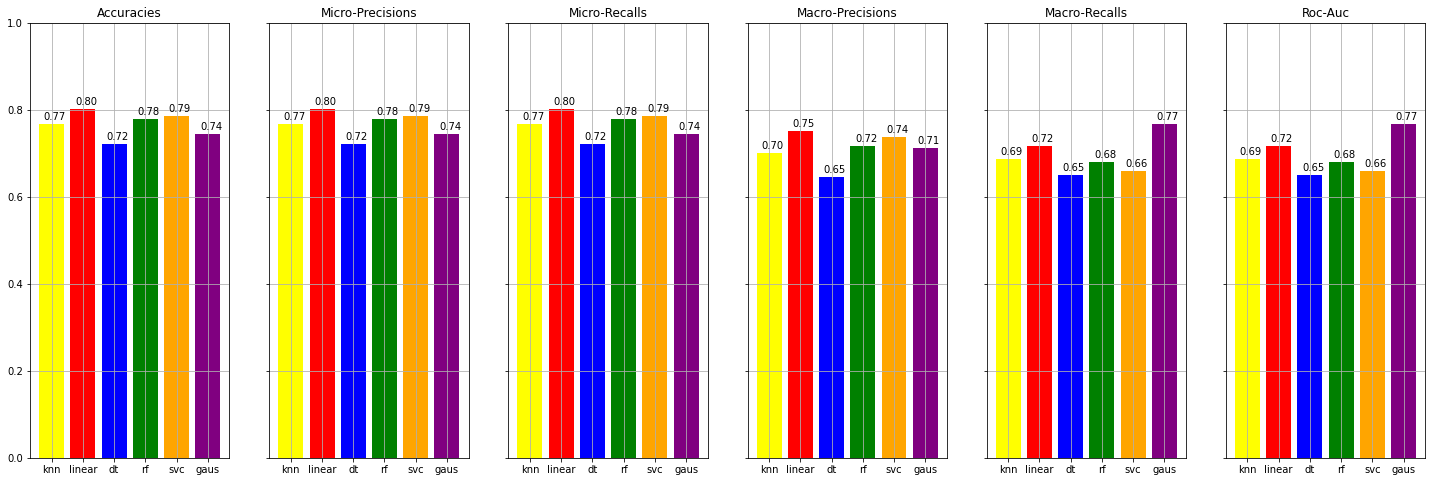

In [127]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(25, 8), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf", "svc", "gaus"]
colors = ["yellow", "red", "blue", "green", "orange", "purple"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

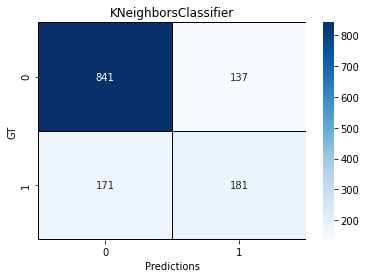

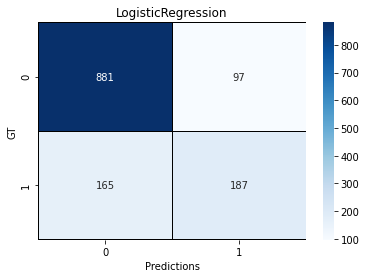

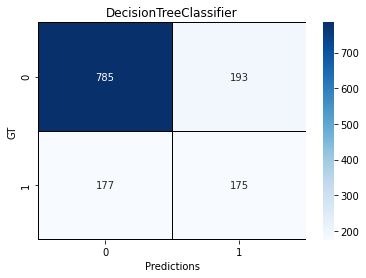

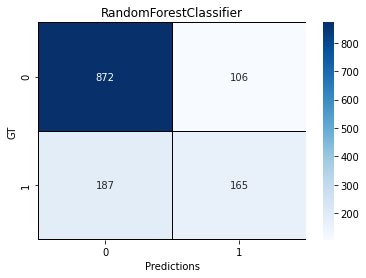

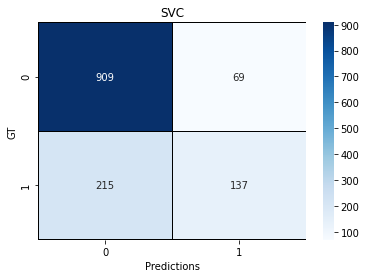

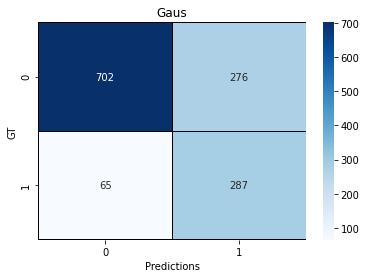

In [129]:
items = ['KNeighborsClassifier', 
         'LogisticRegression', 
         'DecisionTreeClassifier',
         'RandomForestClassifier',
         'SVC', "Gaus"]

for i, item in enumerate(clf_predictions):
    conf_matrix = confusion_matrix(y_test, item)
    plt.title(items[i])
    sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(item),
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')
    plt.ylabel("GT")
    plt.xlabel("Predictions")
    
    plt.show()

**1-D Grid Search**

KNeighborsClassifier

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [131]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 10)
}

In [132]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True, scoring='roc_auc')
knn_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='roc_auc')

In [133]:
res = knn_grid_searcher.cv_results_

In [134]:
means = res['mean_test_score']
stds = res['std_test_score']

No handles with labels found to put in legend.


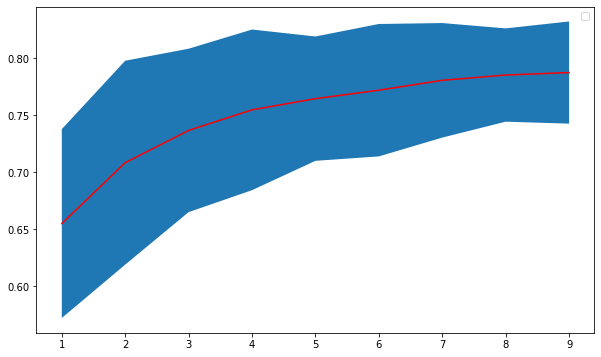

In [135]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, color='red')
plt.fill_between(xs, means + 3 * stds, means - 3 * stds)
plt.legend()
plt.show()

In [136]:
print("Best estimator:", knn_grid_searcher.best_estimator_, "its score:", knn_grid_searcher.best_score_)

Best estimator: KNeighborsClassifier(n_neighbors=9) its score: 0.7872554271456862


In [137]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

Decision Tree

In [138]:
tree_clf = DecisionTreeClassifier(random_state=17)
tree_grid = {
    "max_depth": np.arange(1,50)
}

In [139]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=cv, return_train_score=True, scoring='roc_auc')
tree_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=17, test_size=0.3, train_size=None),
             estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True, scoring='roc_auc')

In [140]:
res_tree = tree_grid_searcher.cv_results_

In [141]:
tree_means = res_tree['mean_test_score']
tree_stds = res_tree['std_test_score']

No handles with labels found to put in legend.


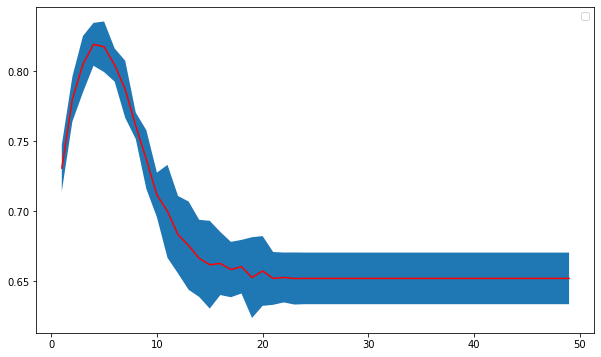

In [142]:
plt.figure(figsize=(10, 6))
xs = tree_grid_searcher.param_grid["max_depth"]
plt.plot(xs, tree_means, color='red')
plt.fill_between(xs, tree_means + 3 * tree_stds, tree_means - 3 * tree_stds)
plt.legend()
plt.show()

In [143]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(max_depth=4, random_state=17) its score: 0.8193228926277557


RandomForest

In [144]:
forest_clf = RandomForestClassifier(random_state=17)
forest_grid = {
    "n_estimators": np.arange(10,100)
}

In [145]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=cv, return_train_score=True, scoring='roc_auc')
forest_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=17, test_size=0.3, train_size=None),
             estimator=RandomForestClassifier(random_state=17),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
             return_train_score=True, scoring='roc_auc')

In [146]:
res_forest = forest_grid_searcher.cv_results_

In [147]:
forest_means = res_forest['mean_test_score']
forest_stds = res_forest['std_test_score']

No handles with labels found to put in legend.


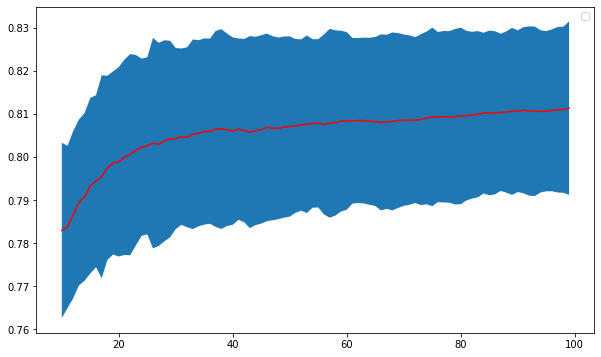

In [148]:
plt.figure(figsize=(10, 6))
xs = forest_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, forest_means, color='red')
plt.fill_between(xs, forest_means + 3 * forest_stds, forest_means - 3 * forest_stds)
plt.legend()
plt.show()

In [149]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(n_estimators=99, random_state=17) its score: 0.8112982195645803


LogisticRegression

In [150]:
log_clf = LogisticRegression(random_state=17)
log_grid = {
    "C": np.arange(0.001,1, 0.001)
}

In [151]:
log_grid_searcher = GridSearchCV(log_clf, log_grid, cv=cv, return_train_score=True, scoring='roc_auc')
log_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=17, test_size=0.3, train_size=None),
             estimator=LogisticRegression(random_state=17),
             param_grid={'C': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033...
       0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953, 0.954,
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])},
             return_train_score=True, scoring='roc_auc')

In [152]:
res_forest = log_grid_searcher.cv_results_

In [153]:
lr_means = res_forest['mean_test_score']
lr_stds = res_forest['std_test_score']

No handles with labels found to put in legend.


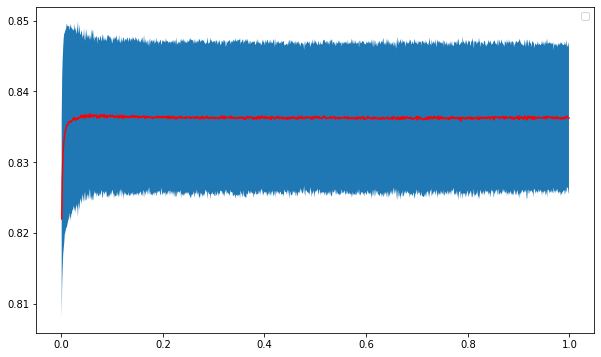

In [154]:
plt.figure(figsize=(10, 6))
xs = log_grid_searcher.param_grid["C"]
plt.plot(xs, lr_means, color='red')
plt.fill_between(xs, lr_means + 3 * lr_stds, lr_means - 3 * lr_stds)
plt.legend()
plt.show()

In [155]:
print("Best estimator:", log_grid_searcher.best_estimator_, "its score:", log_grid_searcher.best_score_)

Best estimator: LogisticRegression(C=0.056, random_state=17) its score: 0.8368334059849601


GaussianNB

In [156]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [157]:
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv,   
                 verbose=1, return_train_score=True,
                 scoring='roc_auc') 
gs_NB.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=17, test_size=0.3, train_size=None),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [158]:
res_gs = gs_NB.cv_results_

In [159]:
gs_means = res_gs['mean_test_score']
gs_stds = res_gs['std_test_score']

No handles with labels found to put in legend.


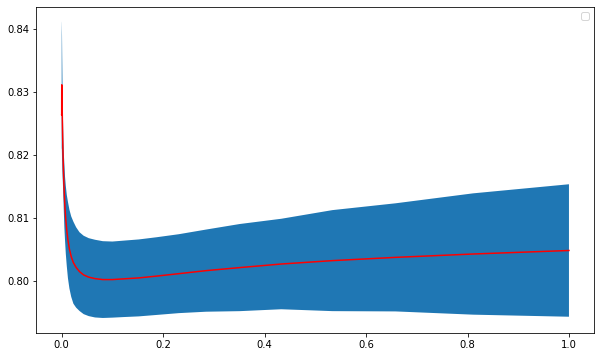

In [160]:
plt.figure(figsize=(10, 6))
xs = gs_NB.param_grid["var_smoothing"]
plt.plot(xs, gs_means, color='red')
plt.fill_between(xs, gs_means + 3 * gs_stds, gs_means - 3 * gs_stds)
plt.legend()
plt.show()

In [161]:
print("Best estimator:", gs_NB.best_estimator_, "its score:", gs_NB.best_score_)

Best estimator: GaussianNB(var_smoothing=0.0001873817422860383) its score: 0.8311162512404258


# 4. Сравнение качества моделей 

In [162]:
clf1 = KNeighborsClassifier(n_neighbors=9)
clf2 = LogisticRegression(C=0.056, random_state=17)
clf3 = DecisionTreeClassifier(max_depth=4, random_state=17)
clf4 = RandomForestClassifier(n_estimators=99, random_state=17)
clf5 = SVC(random_state=17)
clf6 = GaussianNB(var_smoothing=0.0001873817422860383)

default_classifiers = [clf1, clf2, clf3, clf4, clf5, clf6]

In [163]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)  
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

In [164]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]
roc_auc = [roc_auc_score(y_test, pred) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls, roc_auc]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls", "Roc-Auc"]

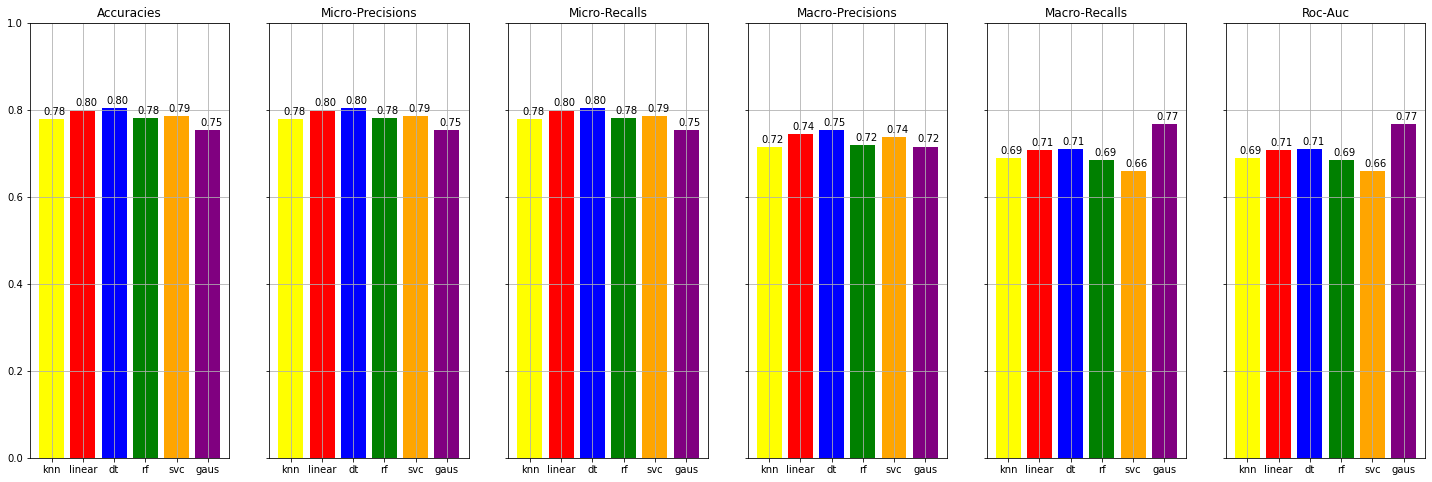

In [166]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(25, 8), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf", "svc", "gaus"]
colors = ["yellow", "red", "blue", "green", "orange", "purple"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

# 5. Бустинг 

In [187]:
from xgboost import XGBClassifier

In [189]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [190]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

print('Model 1 XGboost Report %r' % (classification_report(y_test, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       978\n           1       0.62      0.49      0.55       352\n\n    accuracy                           0.78      1330\n   macro avg       0.72      0.69      0.70      1330\nweighted avg       0.77      0.78      0.78      1330\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86       978\n           1       0.63      0.51      0.57       352\n\n    accuracy                           0.79      1330\n   macro avg       0.73      0.70      0.72      1330\nweighted avg       0.78      0.79      0.79      1330\n'


In [196]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))

Accuracy for model 1: 78.50
Accuracy for model 2: 79.25


In [197]:
#Let's do a little Gridsearch, Hyperparameter Tunning
model3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [198]:
train_model3 = model3.fit(X_train, y_train)
pred3 = train_model3.predict(X_test)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 3: 77.59


In [205]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=None,iid=False, cv=5)

train_model4 = gsearch.fit(X_train, y_train)
pred4 = train_model4.predict(X_test)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 4: 79.85


In [206]:
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))

Accuracy for model 4: 79.85


In [207]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=None,iid=False, cv=5)

train_model5 = gsearch2b.fit(X_train, y_train)
pred5 = train_model5.predict(X_test)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 5: 79.92


In [209]:
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))

Accuracy for model 5: 79.92


In [210]:
#Tune Gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=None,iid=False, cv=5)

train_model6 = gsearch3.fit(X_train, y_train)
pred6 = train_model6.predict(X_test)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 6: 79.47


In [211]:
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 6: 79.47


In [212]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train, y_train)
pred7 = train_model7.predict(X_test)


[15:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [213]:
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test, pred7) * 100))

Accuracy for model 7: 75.56


In [214]:
predss = [pred1, pred2, pred3, pred4, pred5, pred6, pred7]

accuracies = [accuracy_score(y_test, pred) for pred in predss]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in predss] 
micro_recalls = [recall_score(y_test, pred, average='micro', zero_division=1) for pred in predss]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in predss]
macro_recalls = [recall_score(y_test, pred, average='macro', zero_division=1) for pred in predss]
roc_auc = [roc_auc_score(y_test, pred) for pred in predss]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls, roc_auc]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls", "Roc-Auc"]

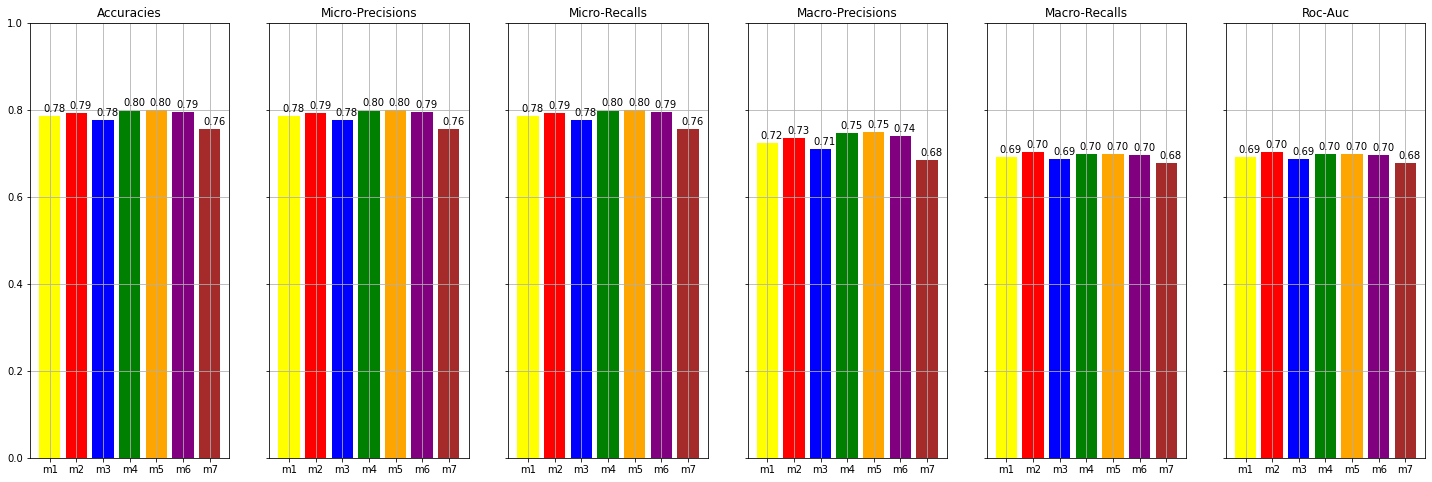

In [215]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(25, 8), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["m1", "m2", "m3", "m4", "m5", "m6", "m7"]
colors = ["yellow", "red", "blue", "green", "orange", "purple", "brown"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

# 6. Работа с Фичами 

### DecisionTreeClassifier

In [216]:
model = DecisionTreeClassifier(max_depth=4, random_state=17)
model.fit(X_train, y_train)  
pred = model.predict(X_test)

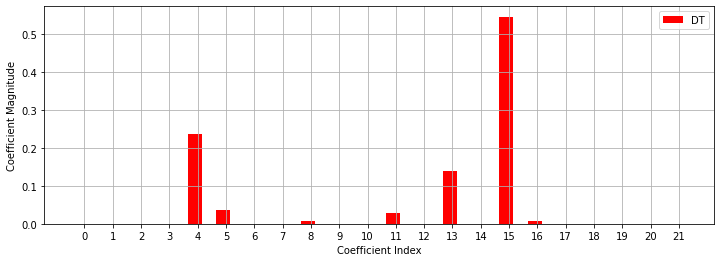

In [220]:
rf_model_coefs = model.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="DT", width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [222]:
important_feature_idx = [4, 5, 8, 11, 13, 15, 16]

In [224]:
X_train_smaller = X_train.iloc[:, important_feature_idx]
X_test_smaller = X_test.iloc[:, important_feature_idx]

In [225]:
model = DecisionTreeClassifier(max_depth=4, random_state=17)
model.fit(X_train_smaller, y_train)  
pred = model.predict(X_test_smaller)

In [226]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision micro:", precision_score(y_test, pred, average="micro", zero_division=1))
print("Recall micro:", recall_score(y_test, pred, average='micro', zero_division=1))
print("Precision macro:", precision_score(y_test, pred, average="macro", zero_division=1))
print("Recall macro:", recall_score(y_test, pred, average='macro', zero_division=1))
print("RocAuc:", roc_auc_score(y_test, pred))

Accuracy: 0.8037593984962406
Precision micro: 0.8037593984962406
Recall micro: 0.8037593984962406
Precision macro: 0.7538325212017434
Recall macro: 0.709271588585239
RocAuc: 0.7092715885852389


### RandomForestClassifier

In [230]:
rf = RandomForestClassifier(n_estimators=99, random_state=17)
rf.fit(X_train, y_train)  
pred = rf.predict(X_test)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


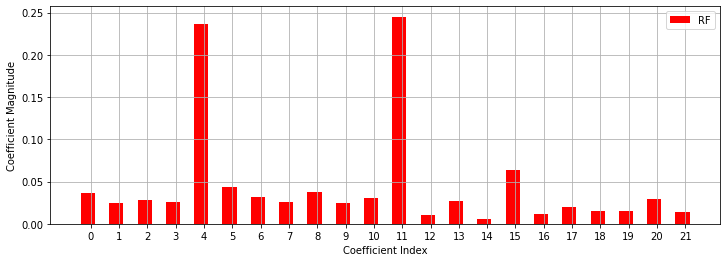

In [231]:
rf_model_coefs = rf.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [232]:
important_feature_idx = [4, 11, 15]

In [233]:
X_train_smaller = X_train.iloc[:, important_feature_idx]
X_test_smaller = X_test.iloc[:, important_feature_idx]

In [234]:
rf = RandomForestClassifier(n_estimators=99, random_state=17)
rf.fit(X_train_smaller, y_train)  
pred = rf.predict(X_test_smaller)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [235]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision micro:", precision_score(y_test, pred, average="micro", zero_division=1))
print("Recall micro:", recall_score(y_test, pred, average='micro', zero_division=1))
print("Precision macro:", precision_score(y_test, pred, average="macro", zero_division=1))
print("Recall macro:", recall_score(y_test, pred, average='macro', zero_division=1))
print("RocAuc:", roc_auc_score(y_test, pred))

Accuracy: 0.7609022556390977
Precision micro: 0.7609022556390977
Recall micro: 0.7609022556390977
Precision macro: 0.6899288366336633
Recall macro: 0.6783120700873768
RocAuc: 0.6783120700873768


### LogisticRegression

In [236]:
lr = LogisticRegression(C=0.056, random_state=17)
lr.fit(X_train, y_train)  

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.056, random_state=17)

No handles with labels found to put in legend.


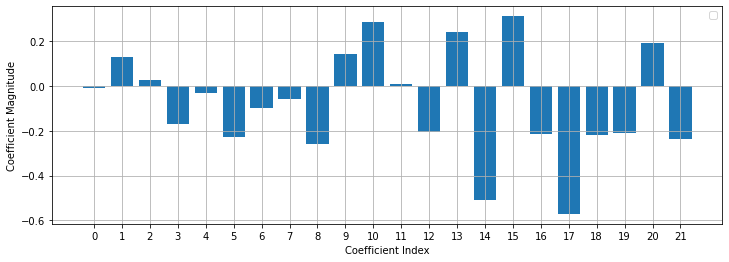

In [237]:
model_coefs = lr.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)
indexes = np.array(range(0, len(model_coefs[0])))

plt.figure(figsize=(12,4))
plt.bar(indexes, model_coefs[0])
plt.xticks(indexes)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [238]:
important_feature_idx = [5, 8, 10, 13, 14, 15, 16, 17, 18, 19, 21]

In [239]:
X_train_smaller = X_train.iloc[:, important_feature_idx]
X_test_smaller = X_test.iloc[:, important_feature_idx]

In [241]:
lr = LogisticRegression(C=0.056, random_state=17)
lr.fit(X_train_smaller, y_train)  
pred = lr.predict(X_test_smaller)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [242]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision micro:", precision_score(y_test, pred, average="micro", zero_division=1))
print("Recall micro:", recall_score(y_test, pred, average='micro', zero_division=1))
print("Precision macro:", precision_score(y_test, pred, average="macro", zero_division=1))
print("Recall macro:", recall_score(y_test, pred, average='macro', zero_division=1))
print("RocAuc:", roc_auc_score(y_test, pred))

Accuracy: 0.7969924812030075
Precision micro: 0.7969924812030075
Recall micro: 0.7969924812030075
Precision macro: 0.744882594273743
Recall macro: 0.6955782905744562
RocAuc: 0.6955782905744561
